In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
accident = pd.read_csv('datasets//accident_data.csv')

In [3]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [5]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unknown condition')
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unknown weather')

In [6]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [7]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660679 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660679 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  660679 non-null  object 
 10  Road_Type                660679 non-null  object 
 11  Urban_or_Rural_Area      660679 non-null  object 
 12  Weather_Conditions       660679 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [8]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['Latitude'] = accident['Latitude'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [9]:
accident.dtypes

Index                        object
Accident_Severity          category
Accident Date                object
Latitude                   category
Light_Conditions           category
District Area              category
Longitude                  category
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions    category
Road_Type                  category
Urban_or_Rural_Area        category
Weather_Conditions         category
Vehicle_Type               category
dtype: object

In [10]:
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident['Accident Date'] = accident['Accident Date'].str.strip()
accident['Accident Date'] = accident['Accident Date'].str.replace('/','-')

In [11]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'],dayfirst=True,errors = 'coerce')

In [12]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['DayofWeek'] = accident['Accident Date'].dt.dayofweek

In [13]:
accident['Year'] = accident['Year'].astype('category')
accident['Month'] = accident['Month'].astype('category')
accident['DayofWeek'] = accident['DayofWeek'].astype('category')

In [14]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  category      
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  category      
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

In [15]:
accident.describe()

,Accident Date,Number_of_Casualties,Number_of_Vehicles
count,660679,660679.000000,660679.000000
mean,2020-11-30 08:30:32.761749760,1.357040,1.831255
min,2019-01-01 00:00:00,1.000000,1.000000
25%,2019-11-27 00:00:00,1.000000,1.000000
50%,2020-11-13 00:00:00,1.000000,2.000000
75%,2021-11-17 00:00:00,1.000000,2.000000
max,2022-12-31 00:00:00,68.000000,32.000000
std,NaN,0.824847,0.715269


In [16]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,DayofWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,unknown weather,Taxi/Private hire car,2019,8,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,unknown weather,Other vehicle,2019,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,2


<H1>INSIGHTS</H1>

<h2>1. How many accidents are Fatal, Serious and Slight?</h2>
<h3>- There are 8661 Fatal accidents, while 88217 for serious accidents, and 563801 for slight accidents.</h3>

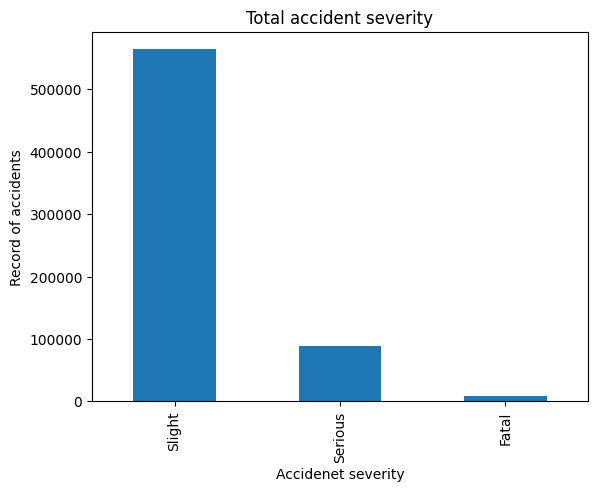

In [17]:
total_severity = accident['Accident_Severity'].value_counts()

total_severity.plot (kind='bar')
plt.title('Total accident severity')
plt.xlabel('Accidenet severity')
plt.ylabel('Record of accidents')
plt.show()

In [18]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h2>2. What year have the most accidents?</h2>
<h3>- Year 2019 have the most accidents with 182,115 records.</h3>

<h2>3. What year have the least accidents?</h2>
<h3>- Year 2022 have the least accidents with 144,419 records.</h3>

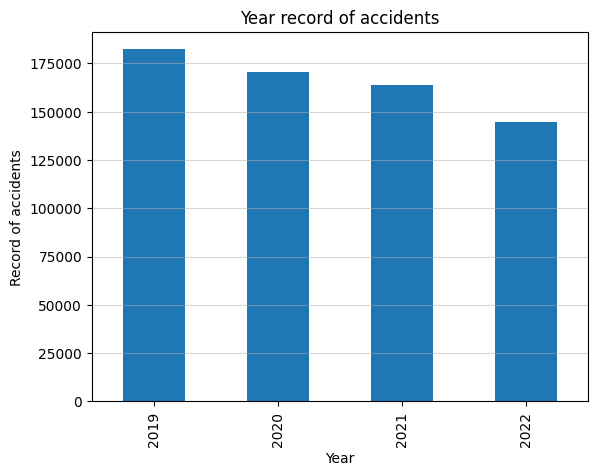

In [19]:
year_leastaccidents = accident['Year'].value_counts()

year_leastaccidents.plot (kind='bar')
plt.title('Year record of accidents')
plt.xlabel('Year')
plt.ylabel('Record of accidents')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [20]:
accident['Year'].value_counts()

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

<h2>4. Do more accidents happen in the urban or rural area?</h2>
<h3>- More accidents happen in urban area with 421,678 records a total of 63.84%.</h3>

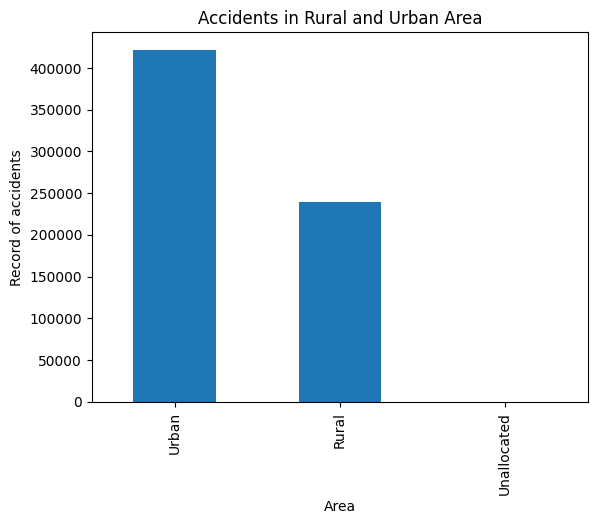

In [21]:
accident_ruralurban = accident['Urban_or_Rural_Area'].value_counts()

accident_ruralurban.plot (kind='bar')
plt.title('Accidents in Rural and Urban Area')
plt.xlabel('Area')
plt.ylabel('Record of accidents')
plt.show()

In [22]:
accident['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h2>5. What district area has the most record of accidents?</h2>
<h3>- Birmingham has the most record of accidents with 13,491.</h3>

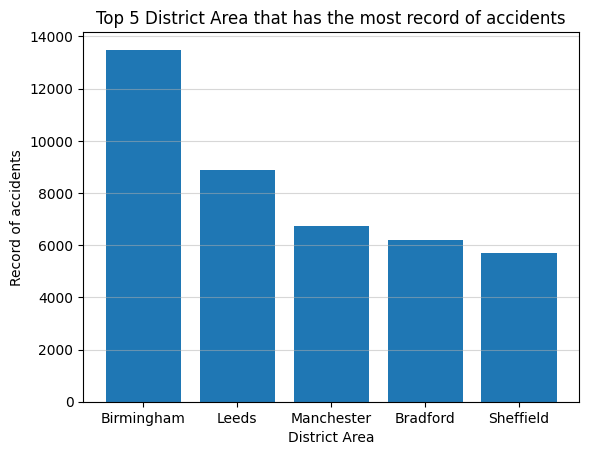

In [23]:
top5district = accident['District Area'].value_counts().head(5).reset_index()

plt.bar(top5district['District Area'], top5district['count'])
plt.title('Top 5 District Area that has the most record of accidents')
plt.xlabel('District Area')
plt.ylabel('Record of accidents')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [24]:
top10 = accident.groupby(['District Area']).size().reset_index(name='Accident_Count')
top7 = top10[top10['Accident_Count']  > 5000]
top7

,District Area,Accident_Count
24,Birmingham,13491
36,Bradford,6212
195,Leeds,8898
201,Liverpool,5587
208,Manchester,6720
303,Sheffield,5710
404,Westminster,5706


In [25]:
# plt.bar(top7['District Area'], top7['Accident_Count'])
# plt.title('Top 7 District area most record of accidents')
# plt.xlabel('District Area')
# plt.ylabel('Record of accidents')
# plt.gcf().set_size_inches(13,8)
# plt.show()

<h2>6. What district area has the least record of accidents?</h2>
<h3>- Clackmannanshire has the least record of accidents with 91.</h3>

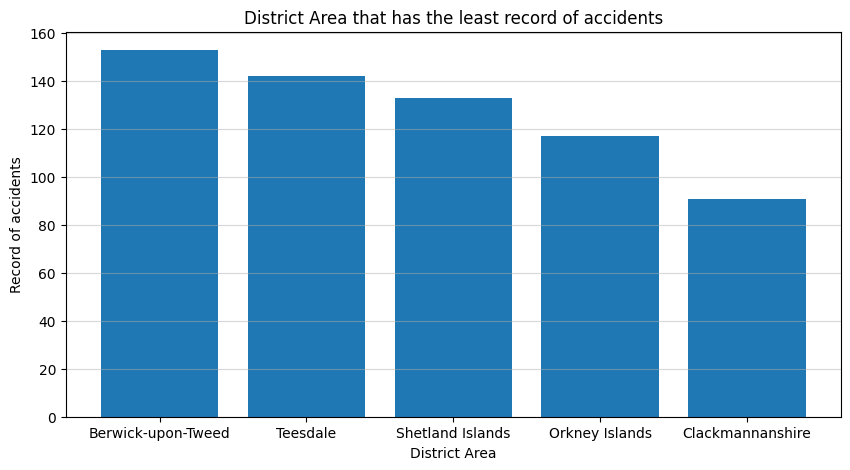

In [26]:
least5district = accident['District Area'].value_counts().tail(5).reset_index()

plt.bar(least5district['District Area'], least5district['count'])
plt.title('District Area that has the least record of accidents')
plt.xlabel('District Area')
plt.ylabel('Record of accidents')
plt.grid(axis='y', alpha=0.5)
plt.gcf().set_size_inches(10,5)
plt.show()

In [27]:
accident['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<h2>7. What exact date has the most record of accidents?</h2>
<h3>- November 30 2019 has the most record of accidents.</h3>

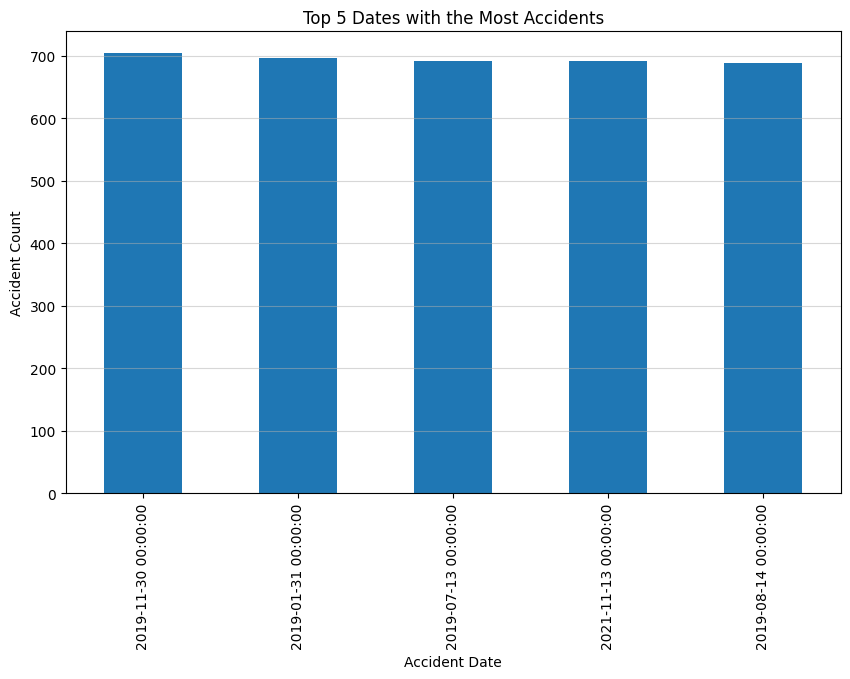

In [28]:
mostdate = accident['Accident Date'].value_counts().head(5).reset_index()
mostdate.columns = ['Accident Date', 'Accident Count']  

mostdate.plot(kind='bar',x='Accident Date', y='Accident Count', legend = False)
plt.title('Top 5 Dates with the Most Accidents')
plt.xlabel('Accident Date')
plt.ylabel('Accident Count')
plt.grid(axis='y', alpha=0.5)  
plt.gcf().set_size_inches(10, 6) 
plt.show()

<h2>8. What exact date has the least record of accidents?</h2>
<h3>- December 25 2020 has the least record of accidents.</h3>

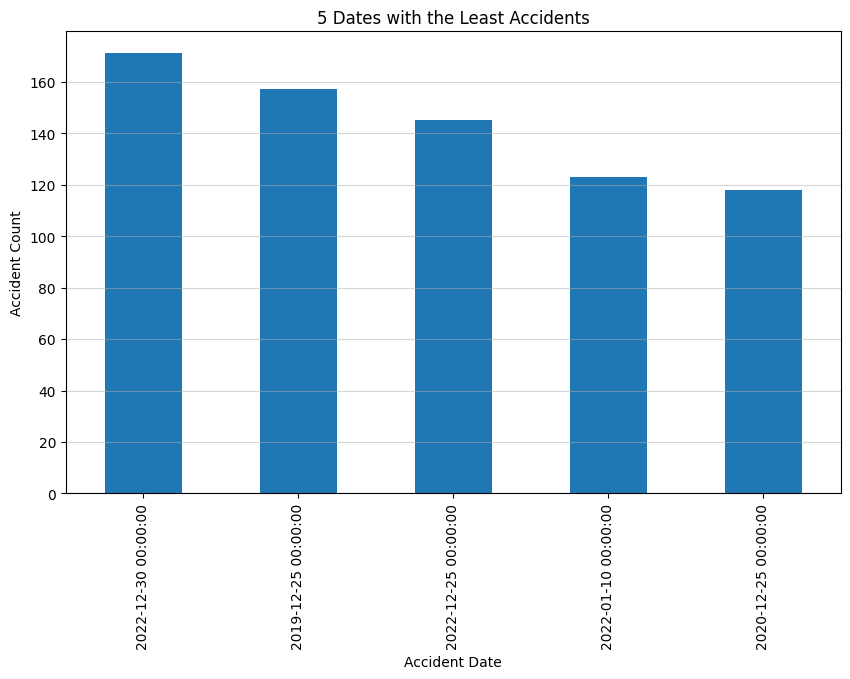

In [29]:
leastdate = accident['Accident Date'].value_counts().tail(5).reset_index()
leastdate.columns = ['Accident Date', 'Accident Count']  

leastdate.plot(kind='bar',x='Accident Date', y='Accident Count', legend = False)
plt.title('5 Dates with the Least Accidents')
plt.xlabel('Accident Date')
plt.ylabel('Accident Count')
plt.grid(axis='y', alpha=0.5)  
plt.gcf().set_size_inches(10, 6) 
plt.show()

In [30]:
accident['Accident Date'].value_counts()

Accident Date
2019-11-30    704
2019-01-31    697
2019-07-13    692
2021-11-13    692
2019-08-14    688
             ... 
2022-12-30    171
2019-12-25    157
2022-12-25    145
2022-01-10    123
2020-12-25    118
Name: count, Length: 1461, dtype: int64

In [31]:
fatallang = accident[accident['Accident_Severity'] == 'Fatal']
fatallang.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8661 entries, 7 to 660627
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Index                    8661 non-null   object        
 1   Accident_Severity        8661 non-null   category      
 2   Accident Date            8661 non-null   datetime64[ns]
 3   Latitude                 8661 non-null   category      
 4   Light_Conditions         8661 non-null   category      
 5   District Area            8661 non-null   category      
 6   Longitude                8661 non-null   category      
 7   Number_of_Casualties     8661 non-null   int64         
 8   Number_of_Vehicles       8661 non-null   int64         
 9   Road_Surface_Conditions  8661 non-null   category      
 10  Road_Type                8661 non-null   category      
 11  Urban_or_Rural_Area      8661 non-null   category      
 12  Weather_Conditions       8661 non-nul

<h2>9. Does more fatal accidents happen in the urban or rural?</h2>
<h3>- There is more fatal accidents in rural area than the urban area.</h3>

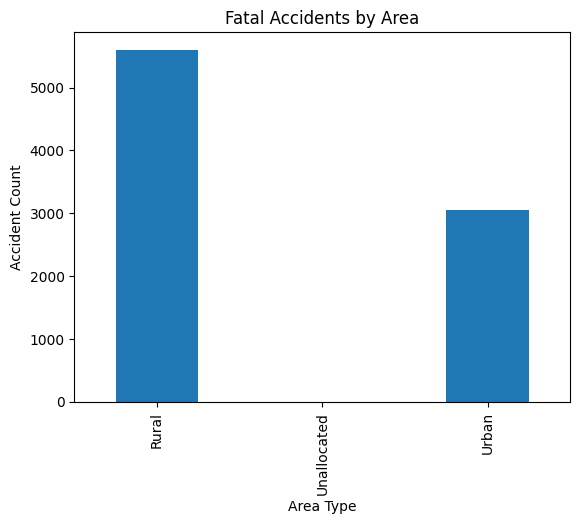

In [32]:
areafatal = fatallang.groupby(['Urban_or_Rural_Area']).size().reset_index(name='Count')

areafatal.plot(kind="bar", x='Urban_or_Rural_Area', y='Count', legend=False)
plt.title("Fatal Accidents by Area")
plt.xlabel("Area Type")
plt.ylabel("Accident Count")
plt.show()

In [33]:
fatallang['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Rural          5601
Urban          3060
Unallocated       0
Name: count, dtype: int64

In [34]:
fatalsaurbanorural = accident.groupby(['Accident_Severity','Urban_or_Rural_Area']).size()
fatalsaurbanorural.unstack()

Urban_or_Rural_Area,Rural,Unallocated,Urban
Accident_Severity,,,
Fatal,5601,0,3060
Serious,37312,1,50904
Slight,196077,10,367714


<h2>10. Do accidents with more number of vehicles make fatal accidents than less number of vehicles?</h2>
<h3>- No, fatal accidents are more likely to happen with less number of vehicles.</h3>

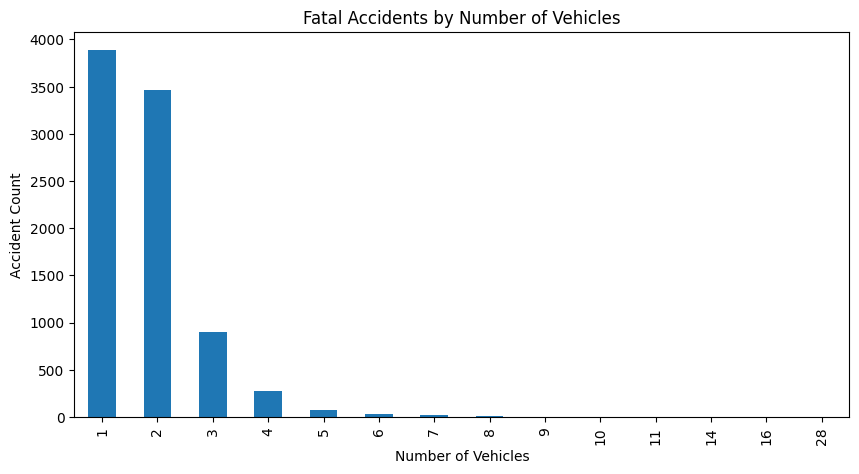

In [106]:
fatalnumvehicles = fatallang.groupby(['Number_of_Vehicles']).size().reset_index(name='Count')

fatalnumvehicles.plot(kind="bar", x='Number_of_Vehicles', y='Count', legend=False)
plt.title("Fatal Accidents by Number of Vehicles")
plt.xlabel("Number of Vehicles")
plt.ylabel("Accident Count")
plt.gcf().set_size_inches(10, 5) 
plt.show()

In [36]:
fatalsavehicles = fatallang.groupby(['Accident_Severity','Number_of_Vehicles']).size().unstack()
fatalsavehicles

Number_of_Vehicles,1,2,3,4,5,6,7,8,9,10,11,14,16,28
Accident_Severity,,,,,,,,,,,,,,
Fatal,3885,3467,900,272,70,28,17,12,1,2,2,3,1,1
Serious,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Slight,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h2>11. Which vehicle type is in the most dangerous or fatal accidents?</h2>
<h3>- Car is the most dangerous vehicle type with a total of 75.94% records of fatal accidents.</h3>

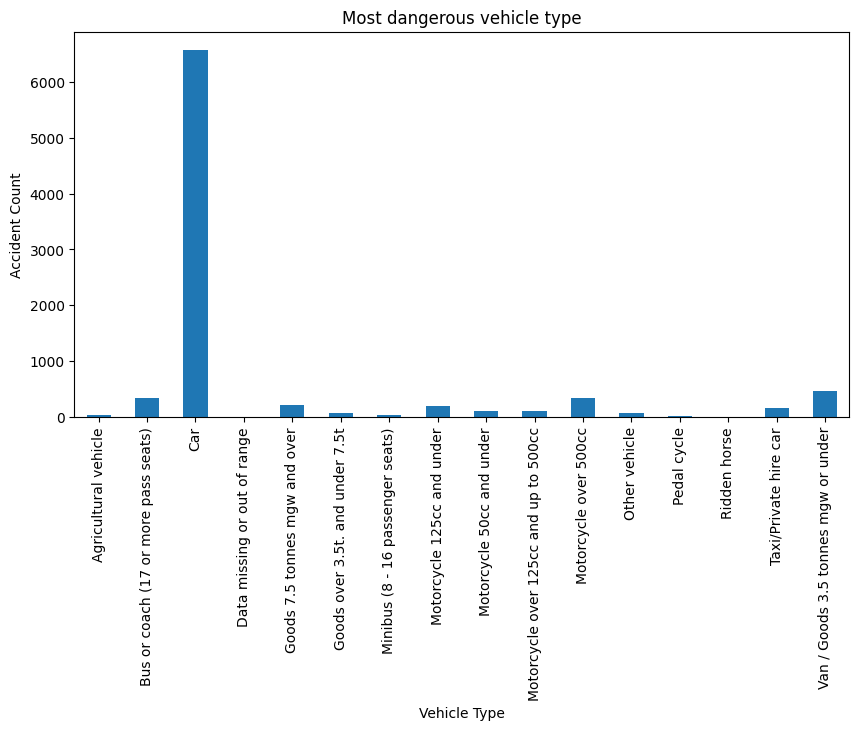

In [107]:
vehiclefatal = fatallang.groupby(['Vehicle_Type']).size().reset_index(name='Count')

vehiclefatal.plot(kind="bar", x='Vehicle_Type', y='Count', legend=False)
plt.title("Most dangerous vehicle type")
plt.xlabel("Vehicle Type")
plt.ylabel("Accident Count")
plt.gcf().set_size_inches(10, 5) 
plt.show()

In [38]:
fatalsavehicles = accident.groupby(['Accident_Severity','Vehicle_Type']).size()
fatalsavehicles.unstack()

Vehicle_Type,Agricultural vehicle,Bus or coach (17 or more pass seats),Car,Data missing or out of range,Goods 7.5 tonnes mgw and over,Goods over 3.5t. and under 7.5t,Minibus (8 - 16 passenger seats),Motorcycle 125cc and under,Motorcycle 50cc and under,Motorcycle over 125cc and up to 500cc,Motorcycle over 500cc,Other vehicle,Pedal cycle,Ridden horse,Taxi/Private hire car,Van / Goods 3.5 tonnes mgw or under
Accident_Severity,,,,,,,,,,,,,,,,
Fatal,21,325,6577,0,216,67,29,189,95,105,339,70,6,0,155,467
Serious,282,3373,66461,0,2321,857,276,2031,1014,1014,3457,767,39,0,1771,4554
Slight,1644,22180,424954,6,14770,5172,1671,13049,6494,6537,21861,4800,152,4,11368,29139


In [39]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h2>12. How many number of vehicles are usually in an accident?</h2>
<h3>- Usually it consists of 2 vehicles in an accident.</h3>

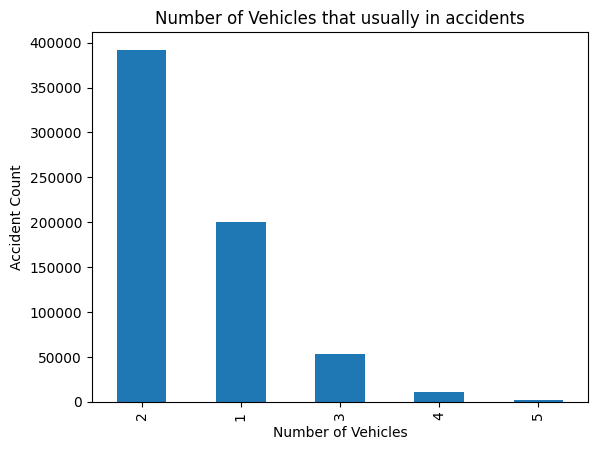

In [40]:
numofcars = accident['Number_of_Vehicles'].value_counts().head(5).reset_index()
numofcars.plot(kind = "bar", x = "Number_of_Vehicles", y="count", legend=False)
plt.title("Number of Vehicles that usually in accidents")
plt.xlabel("Number of Vehicles")
plt.ylabel("Accident Count")
plt.show()

In [41]:
accident['Number_of_Vehicles'].value_counts()

Number_of_Vehicles
2     391995
1     200787
3      52806
4      11300
5       2464
6        758
7        296
8        147
9         57
10        27
11        12
14         9
12         7
13         6
16         4
28         1
15         1
32         1
19         1
Name: count, dtype: int64

<h2>13. Do accidents with more casualties have higher severity?</h2>
<h3>- No, the less casulaties the higher severity.</h3>

In [82]:
casualtiesofseverity = accident.groupby(['Accident_Severity','Number_of_Casualties']).size().unstack()
casualtiesofseverity

Number_of_Casualties,1,2,3,4,5,6,7,8,9,10,...,29,32,40,42,43,45,47,48,62,68
Accident_Severity,,,,,,,,,,,,,,,,,,,,,
Fatal,4843,2005,886,452,240,122,54,17,13,7,...,0,0,1,1,0,0,0,1,1,1
Serious,64271,14495,5266,2357,1037,459,157,68,33,17,...,2,0,0,1,0,1,0,0,0,0
Slight,434927,91471,24624,8347,2846,944,328,129,66,34,...,1,1,1,0,1,0,1,0,0,0


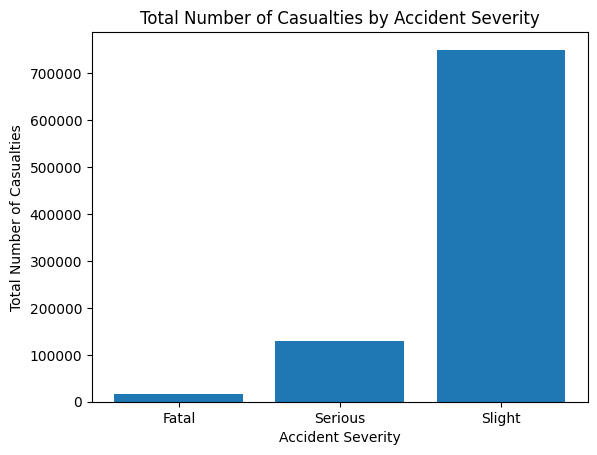

In [83]:
casualtiesofseverity = accident.groupby('Accident_Severity')['Number_of_Casualties'].sum().reset_index()
plt.bar(casualtiesofseverity['Accident_Severity'], casualtiesofseverity['Number_of_Casualties'])
plt.title("Total Number of Casualties by Accident Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Total Number of Casualties")
plt.show()

<h2>14. Are accidents more common at night or during the day?</h2>
<h3>- Accidents are more common during the day with 484,880 records.</h3>

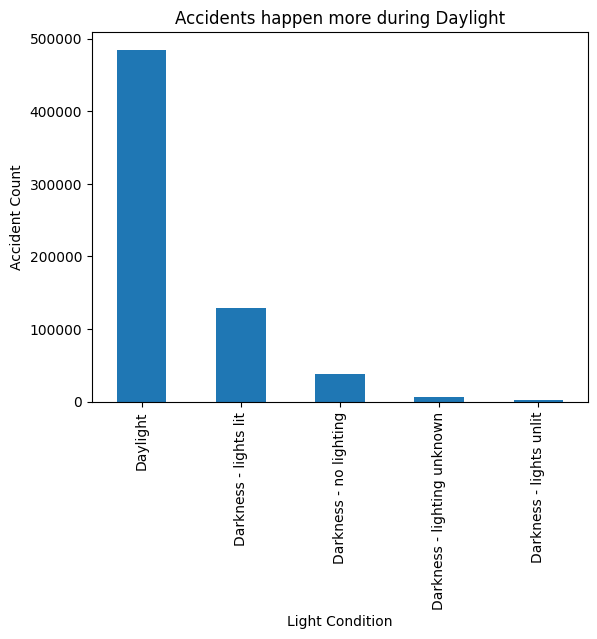

In [44]:
dayornight = accident['Light_Conditions'].value_counts().reset_index()
dayornight.plot(kind="bar", x = "Light_Conditions", y="count", legend=False)
plt.title("Accidents happen more during Daylight")
plt.xlabel("Light Condition")
plt.ylabel("Accident Count")
plt.show()

In [45]:
accident['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

In [46]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  category      
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  category      
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

<h2>15. On what year does motorcycles over 500cc has the most accident records?</h2>
<h3>- On 2019, there are 7,686 accident records of motorcycle over 500cc.</h3>

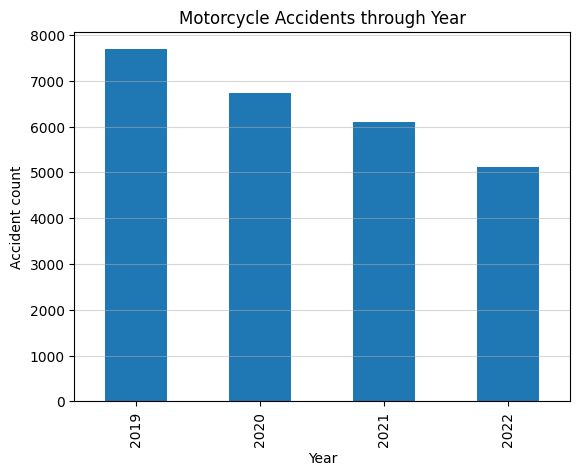

In [47]:
motor500lang = accident[accident['Vehicle_Type'] == 'Motorcycle over 500cc']
motor500langgraph = motor500lang['Year'].value_counts().reset_index()
motor500langgraph.plot(kind="bar", x ='Year', y="count",legend=False)
plt.title("Motorcycle Accidents through Year")
plt.ylabel("Accident count")
plt.grid(axis='y', alpha=0.5)
plt.show()

In [48]:
casualtiesofseverity = accident.groupby(['Year','Vehicle_Type']).size().unstack()
casualtiesofseverity

Vehicle_Type,Agricultural vehicle,Bus or coach (17 or more pass seats),Car,Data missing or out of range,Goods 7.5 tonnes mgw and over,Goods over 3.5t. and under 7.5t,Minibus (8 - 16 passenger seats),Motorcycle 125cc and under,Motorcycle 50cc and under,Motorcycle over 125cc and up to 500cc,Motorcycle over 500cc,Other vehicle,Pedal cycle,Ridden horse,Taxi/Private hire car,Van / Goods 3.5 tonnes mgw or under
Year,,,,,,,,,,,,,,,,
2019,636,10483,130304,0,6247,2049,625,4313,2136,2446,7686,1588,68,1,4230,9303
2020,562,6709,127894,6,4528,1545,530,4104,1764,1925,6745,1533,63,0,3521,9162
2021,450,4155,128026,0,3569,1395,420,3273,1968,1915,6110,1420,40,2,2705,8106
2022,299,4531,111768,0,2963,1107,401,3579,1735,1370,5116,1096,26,1,2838,7589


<h2>16. Does bad weather cause more severe accidents?</h2>
<h3>- No, because the accidents are usually happened during fine weather with no high winds.</h3>

In [91]:
weatherseverity = accident.groupby(['Accident_Severity','Weather_Conditions']).size().unstack()
weatherseverity.reset_index(names="count")

Weather_Conditions,count,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds,unknown weather
0,Fatal,175,7100,82,165,145,848,3,36,107
1,Serious,1245,72046,483,1801,1261,9468,109,565,1239
2,Slight,7134,441739,2963,15184,8209,69380,773,5637,12782


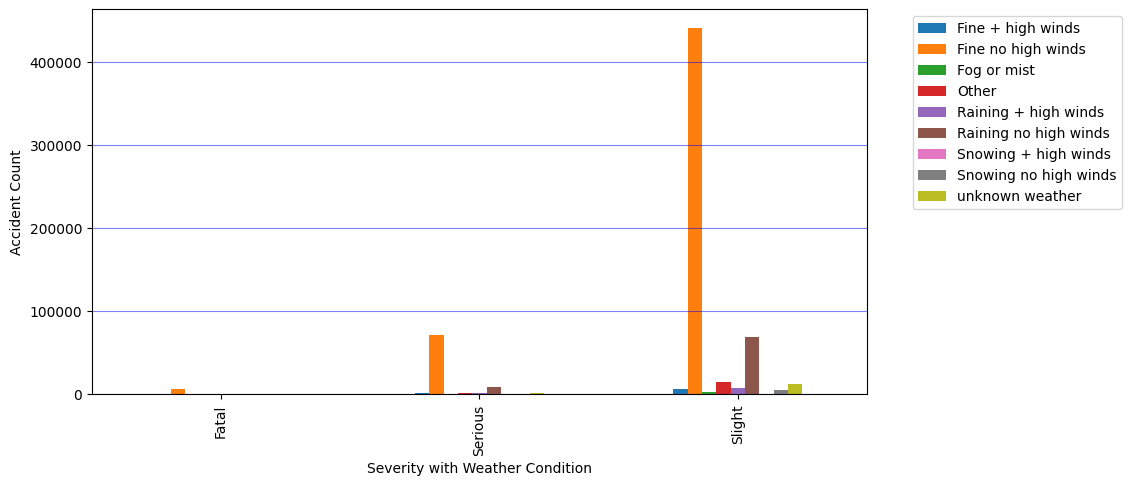

In [108]:
weatherseverity.plot(kind="bar", )
plt.grid(axis="y", alpha=0.5, color="Blue")
plt.xlabel("Severity with Weather Condition")
plt.ylabel("Accident Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gcf().set_size_inches(10, 5) 
plt.show()

<h2>16. What is the total number of casualties in rural areas in 2019?</h2>
<h3>- 100,320 total of casualties in rural areas 2019.</h3>

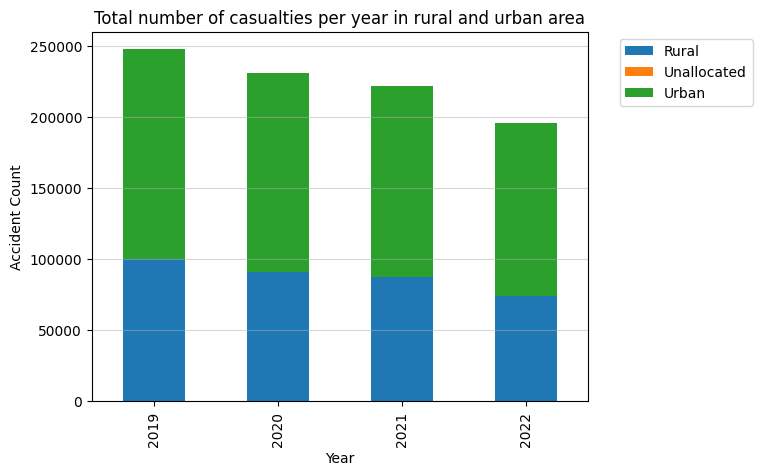

In [50]:
totalcasualtyrural2019 = accident.groupby(['Year','Urban_or_Rural_Area'])['Number_of_Casualties'].sum().unstack()
totalcasualtyrural2019.plot(kind = "bar", stacked = True)
plt.title("Total number of casualties per year in rural and urban area")
plt.xlabel("Year")
plt.ylabel("Accident Count")
plt.grid(axis = "y", alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [51]:
year2019 = accident[accident['Year'] == 2019]
ruralyear2019 = year2019[year2019['Urban_or_Rural_Area'] == "Rural"]
ruralyear2019['Number_of_Casualties'].sum()

np.int64(100320)

<h2>17. Which road type had the most fatal accidents in 2020?</h2>
<h3>- Single carriageway had the most fatal accidents in 2020 with total of 1,770.</h3>

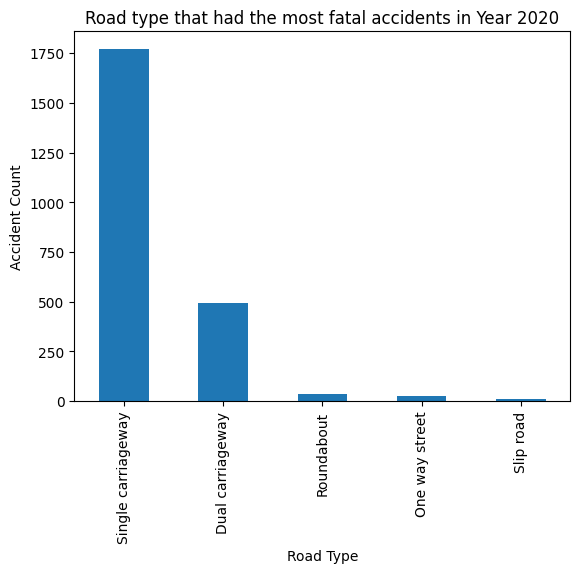

In [52]:
year2020 = accident[accident['Year'] == 2020]
fatalyear2020 = year2020[year2020['Accident_Severity'] == 'Fatal']
fatalyear2020graph = fatalyear2020['Road_Type'].value_counts().reset_index()
fatalyear2020graph.plot(kind="bar", x="Road_Type", y="count", legend=False)
plt.title("Road type that had the most fatal accidents in Year 2020")
plt.xlabel("Road Type")
plt.ylabel("Accident Count")
plt.show()

<h2>18. Is there a correlation between number of vehicles and number of casualties?</h2>
<h3>- There is no correlation between number of vehicles and number of casualties.</h3>

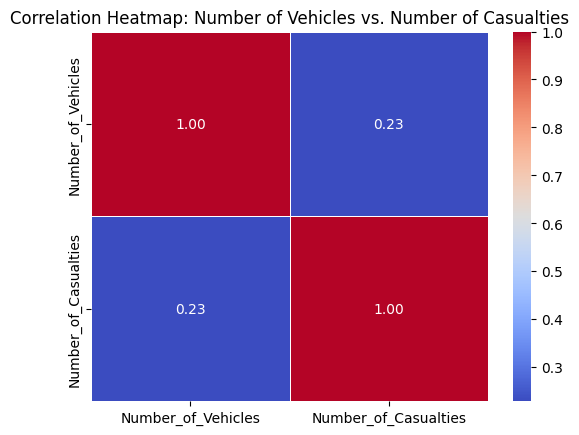

In [53]:
correlation_data = accident[['Number_of_Vehicles', 'Number_of_Casualties']]
correlation_matrix = correlation_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Number of Vehicles vs. Number of Casualties")
plt.show()

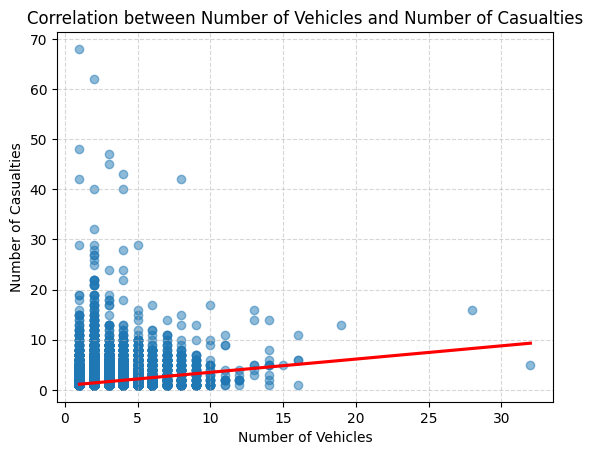

In [54]:
sns.regplot(x=accident['Number_of_Vehicles'], y=accident['Number_of_Casualties'], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

plt.title("Correlation between Number of Vehicles and Number of Casualties")
plt.xlabel("Number of Vehicles")
plt.ylabel("Number of Casualties")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [55]:
vehiclescasualties = accident['Number_of_Vehicles'].corr(accident['Number_of_Casualties'])
vehiclescasualties

np.float64(0.22888886126927635)

<h2>19. What vehicle type have the most accidents during the month of december?</h2>
<h3>- Car has the most accident records during the month of december wit the total of 38,980.</h3>

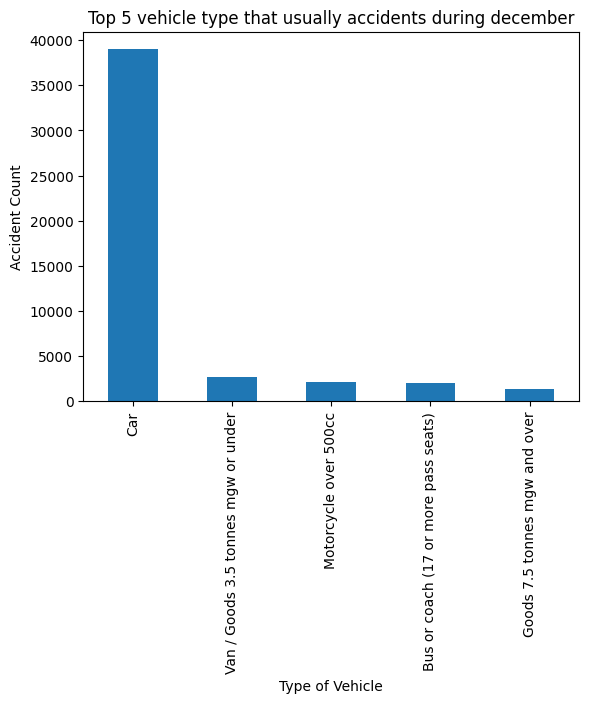

In [56]:
decemberlang = accident[accident['Month'] == 12]
top5decemberlang = decemberlang['Vehicle_Type'].value_counts().head(5).reset_index()
top5decemberlang.plot(kind="bar", x="Vehicle_Type", y="count",legend=False)
plt.title("Top 5 vehicle type that usually accidents during december")
plt.xlabel("Type of Vehicle")
plt.ylabel("Accident Count")
plt.show()

In [57]:
vehicleacddecember = accident.groupby(['Vehicle_Type','Month']).size()
vehicleacddecember.unstack()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Vehicle_Type,,,,,,,,,,,,
Agricultural vehicle,154,149,174,146,184,142,178,155,157,181,174,153
Bus or coach (17 or more pass seats),2161,1965,2141,1912,2265,2204,2319,2037,2201,2282,2375,2016
Car,39751,37306,40677,39132,42547,42581,43343,40718,42525,44791,45641,38980
Data missing or out of range,0,0,1,0,0,0,0,0,0,4,0,1
Goods 7.5 tonnes mgw and over,1402,1284,1423,1394,1489,1437,1485,1424,1460,1571,1524,1414
Goods over 3.5t. and under 7.5t,527,446,477,492,496,520,574,503,501,543,564,453
Minibus (8 - 16 passenger seats),160,149,160,177,185,168,168,169,164,159,175,142
Motorcycle 125cc and under,1188,1193,1290,1131,1248,1304,1351,1244,1323,1401,1393,1203
Motorcycle 50cc and under,635,605,695,574,619,626,642,642,643,656,659,607


<h2>20. What specific day of week has the most accidents while riding a motorcycle with over 500cc?</h2>
<h3>- Saturday, with the total of 4,200 records.</h3>

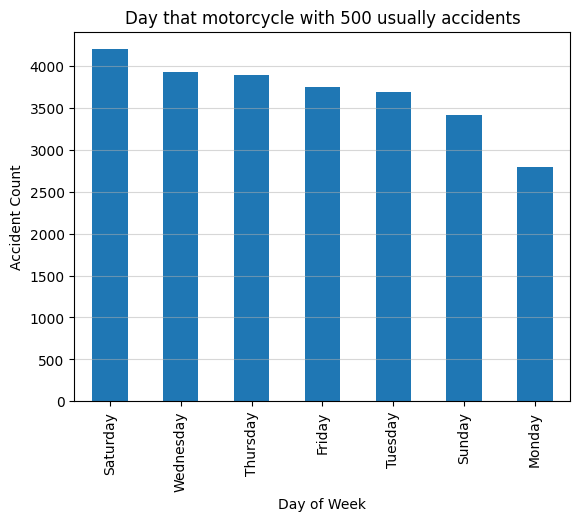

In [58]:
motor500cclang = accident[accident['Vehicle_Type'] == 'Motorcycle over 500cc']
motor500cclanggraph = motor500cclang['DayofWeek'].value_counts().reset_index()
dayofweekname = { 
    0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday" 
}
motor500cclanggraph['DayofWeek'] = motor500cclanggraph['DayofWeek'].map(dayofweekname)
motor500cclanggraph.plot(kind="bar", x = 'DayofWeek', y= 'count', legend=False)
plt.title("Day that motorcycle with 500 usually accidents")
plt.xlabel("Day of Week")
plt.ylabel("Accident Count")
plt.grid(axis='y', alpha=0.5)
plt.show()

In [59]:
motor500cclanggraph

,DayofWeek,count
0,Saturday,4200
1,Wednesday,3927
2,Thursday,3896
3,Friday,3748
4,Tuesday,3684
5,Sunday,3410
6,Monday,2792


In [60]:
vehicleday = accident.groupby(['Vehicle_Type','DayofWeek']).size()
vehicleday.unstack()

DayofWeek,0,1,2,3,4,5,6
Vehicle_Type,,,,,,,
Agricultural vehicle,195,276,294,300,305,322,255
Bus or coach (17 or more pass seats),2769,3802,3805,3961,3868,4140,3533
Car,54957,71242,75172,74941,73828,80558,67294
Data missing or out of range,0,0,2,0,1,2,1
Goods 7.5 tonnes mgw and over,1916,2484,2608,2529,2607,2828,2335
Goods over 3.5t. and under 7.5t,660,846,915,934,883,1016,842
Minibus (8 - 16 passenger seats),209,290,320,283,301,308,265
Motorcycle 125cc and under,1675,2215,2253,2306,2191,2543,2086
Motorcycle 50cc and under,834,1075,1082,1219,1160,1181,1052


In [61]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  category      
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  category      
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

In [62]:
accident['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

In [63]:
darea_birmingham = accident[accident['District Area'] == 'Birmingham']
darea_birmingham.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13491 entries, 68519 to 583768
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Index                    13491 non-null  object        
 1   Accident_Severity        13491 non-null  category      
 2   Accident Date            13491 non-null  datetime64[ns]
 3   Latitude                 13491 non-null  category      
 4   Light_Conditions         13491 non-null  category      
 5   District Area            13491 non-null  category      
 6   Longitude                13491 non-null  category      
 7   Number_of_Casualties     13491 non-null  int64         
 8   Number_of_Vehicles       13491 non-null  int64         
 9   Road_Surface_Conditions  13491 non-null  category      
 10  Road_Type                13491 non-null  category      
 11  Urban_or_Rural_Area      13491 non-null  category      
 12  Weather_Conditions       13491 n

In [64]:
accident['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

In [65]:
taxicar = accident[accident['Vehicle_Type'] == 'Taxi/Private hire car']
taxicar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13294 entries, 2 to 660642
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Index                    13294 non-null  object        
 1   Accident_Severity        13294 non-null  category      
 2   Accident Date            13294 non-null  datetime64[ns]
 3   Latitude                 13294 non-null  category      
 4   Light_Conditions         13294 non-null  category      
 5   District Area            13294 non-null  category      
 6   Longitude                13294 non-null  category      
 7   Number_of_Casualties     13294 non-null  int64         
 8   Number_of_Vehicles       13294 non-null  int64         
 9   Road_Surface_Conditions  13294 non-null  category      
 10  Road_Type                13294 non-null  category      
 11  Urban_or_Rural_Area      13294 non-null  category      
 12  Weather_Conditions       13294 non-n

In [66]:
taxicar['District Area'] == 'Birmingham'

2         False
26        False
27        False
35        False
45        False
          ...  
660247    False
660266    False
660544    False
660570    False
660642    False
Name: District Area, Length: 13294, dtype: bool

In [67]:
taxicar[taxicar['District Area'] == 'Birmingham'].count()

Index                      504
Accident_Severity          504
Accident Date              504
Latitude                   504
Light_Conditions           504
District Area              504
Longitude                  504
Number_of_Casualties       504
Number_of_Vehicles         504
Road_Surface_Conditions    504
Road_Type                  504
Urban_or_Rural_Area        504
Weather_Conditions         504
Vehicle_Type               504
Year                       504
Month                      504
DayofWeek                  504
dtype: int64

In [68]:
taxibirmingham = taxicar[taxicar['District Area'] == 'Birmingham']
taxibirmingham.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 68532 to 583766
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Index                    504 non-null    object        
 1   Accident_Severity        504 non-null    category      
 2   Accident Date            504 non-null    datetime64[ns]
 3   Latitude                 504 non-null    category      
 4   Light_Conditions         504 non-null    category      
 5   District Area            504 non-null    category      
 6   Longitude                504 non-null    category      
 7   Number_of_Casualties     504 non-null    int64         
 8   Number_of_Vehicles       504 non-null    int64         
 9   Road_Surface_Conditions  504 non-null    category      
 10  Road_Type                504 non-null    category      
 11  Urban_or_Rural_Area      504 non-null    category      
 12  Weather_Conditions       504 non-n

<h2>21. How many Accident records of taxi/Private hire car in birmingham? </h2>
<h3>- There are total of 504 records of accidents in birmingham while riding in taxie/private hire car.</h3>

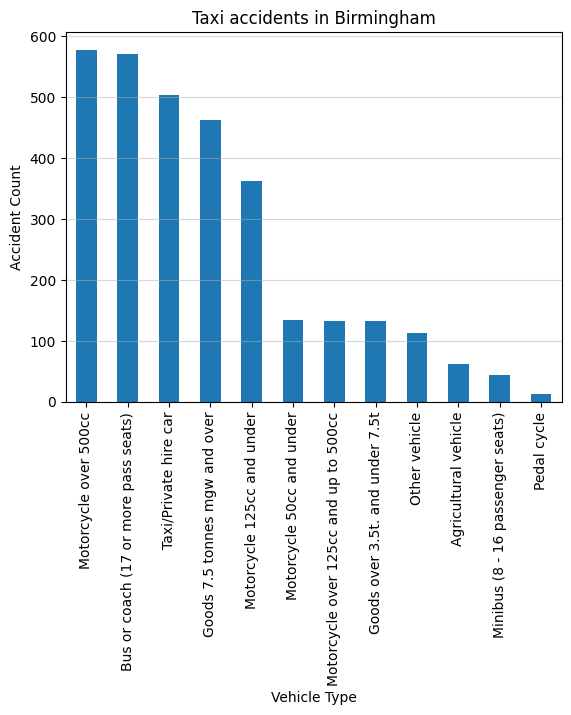

In [69]:
taxidirminghamlang = darea_birmingham['Vehicle_Type'].value_counts().reset_index()

taxidirminghamlangnocar = taxidirminghamlang[(taxidirminghamlang['count'] < 700) & (taxidirminghamlang['count'] > 10)]
taxidirminghamlangnocar.plot(kind = "bar", x = 'Vehicle_Type', y = 'count', legend=False)
plt.title("Taxi accidents in Birmingham")
plt.xlabel("Vehicle Type")
plt.ylabel("Accident Count")
plt.grid(axis='y', alpha=0.5)
plt.show()

<h2>22. What type of light condition do taxi/private hire car usually accidents? </h2>
<h3>- The private hire car accidents usually happens during daylight also with total of 9,752 records.</h3>

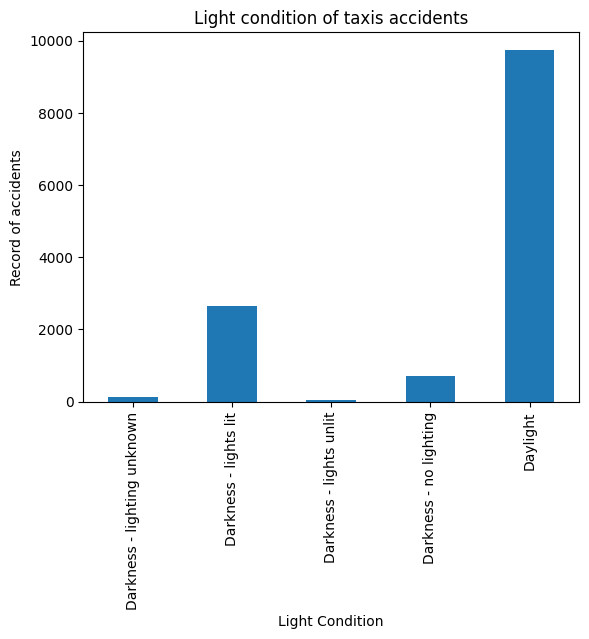

In [70]:
taxi_accidents_daylight = taxicar['Light_Conditions'].value_counts().sort_index()

taxi_accidents_daylight.plot (kind='bar')
plt.title('Light condition of taxis accidents')
plt.xlabel('Light Condition')
plt.ylabel('Record of accidents')
plt.show()

In [71]:
accident['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

In [72]:
taxicar['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       9752
Darkness - lights lit          2658
Darkness - no lighting          704
Darkness - lighting unknown     131
Darkness - lights unlit          49
Name: count, dtype: int64

In [73]:
darknessaccidents = accident[accident['Light_Conditions'] == 'Darkness - lights lit']
darknessaccidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,DayofWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,2
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,unknown weather,Other vehicle,2019,9,1
7,200701BS67370,Fatal,2019-10-03,51.482260,Darkness - lights lit,Kensington and Chelsea,-0.179486,3,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,10,3
8,200701BS67515,Slight,2019-10-31,51.493319,Darkness - lights lit,Kensington and Chelsea,-0.173572,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,10,3
10,200701BS67644,Serious,2019-10-09,51.491944,Darkness - lights lit,Kensington and Chelsea,-0.171898,1,2,Dry,Single carriageway,Urban,Fine no high winds,Goods 7.5 tonnes mgw and over,2019,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660641,201091NL04969,Slight,2022-09-04,60.151776,Darkness - lights lit,Shetland Islands,-1.148217,1,3,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,9,6
660642,201091NL05068,Slight,2022-09-09,60.157212,Darkness - lights lit,Shetland Islands,-1.155823,1,1,Wet or damp,Single carriageway,Rural,Raining + high winds,Taxi/Private hire car,2022,9,4
660646,201091NL05987,Slight,2022-10-26,60.148990,Darkness - lights lit,Shetland Islands,-1.134061,2,1,Wet or damp,Single carriageway,Rural,Raining no high winds,Goods 7.5 tonnes mgw and over,2022,10,2
660651,201091NL06820,Slight,2022-12-04,60.154438,Darkness - lights lit,Shetland Islands,-1.143285,1,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,12,6


In [74]:
accident['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

In [75]:
taxicar['District Area'].value_counts()

District Area
Birmingham                   504
Westminster                  219
Glasgow City                 142
Leeds                        135
Kensington and Chelsea       132
                            ... 
Clackmannanshire               2
Orkney Islands                 2
Chester-le-Street              1
London Airport (Heathrow)      1
Oswestry                       0
Name: count, Length: 422, dtype: int64

In [76]:
accident[accident['District Area'] == 'Westminster'].count()

Index                      5706
Accident_Severity          5706
Accident Date              5706
Latitude                   5706
Light_Conditions           5706
District Area              5706
Longitude                  5706
Number_of_Casualties       5706
Number_of_Vehicles         5706
Road_Surface_Conditions    5706
Road_Type                  5706
Urban_or_Rural_Area        5706
Weather_Conditions         5706
Vehicle_Type               5706
Year                       5706
Month                      5706
DayofWeek                  5706
dtype: int64